## 야후에서 데이터 받아오기

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

ticker = 'XOM'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
data

,XOM
Date,
1999-12-31,19.838715
2000-01-03,19.284643
2000-01-04,18.915266
2000-01-05,19.946453
2000-01-06,20.977617
...,...
2022-09-16,93.209999
2022-09-19,93.199997
2022-09-20,92.440002


## .pct_change() 메소드를 통해 특정 기간의 로그 수익률 계산

In [31]:
# 로그 수익률을 사용해야 계산이 용이, 상세 정보는 아래 링크 확인
# https://insightcampus.co.kr/2019/01/04/%ED%8E%98%EC%96%B4-%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%94%A9-%EA%B8%B0%EC%B4%88%ED%8E%B8-6-%EB%A1%9C%EA%B7%B8-%EC%88%98%EC%9D%B5%EB%A5%A0/
log_returns = np.log(1 + data.pct_change())

## “U”: 로그 수익률의 평균, “var”: 로그수익률의 분산

In [32]:
U = log_returns.mean()

In [33]:
var = log_returns.var()

## 다음 공식을 사용하여 drift(브라운운동에서 사용되는 변수, 주가의 트렌드) 계산: 

$$
drift = u - \frac{1}{2} \cdot var
$$

In [34]:
drift = U - 0.5*var
drift

XOM    0.000126
dtype: float64

## stdev: 로그 수익률의 표준편차 

In [35]:
stdev = log_returns.std()
stdev

XOM    0.016731
dtype: float64

## drift와 stdev array 형식으로 변환

In [36]:
drift.values
stdev.values

array([0.01673128])

## 1년간 평균적으로 장이 열리는 날이 250일이기에 t_intervals 에 250을 할당
## iteration에는 예측을 몇번 할 것인지 갯수 지정

In [37]:
t_intervals = 250
iterations = 10

$$
일일\_수익률 = exp({drift} + {stdev} * z), 
$$ 
<br>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [38]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.95894105, 1.01390248, 1.03510348, ..., 0.99725859, 1.01330346,
        0.99707537],
       [0.99505173, 1.0237771 , 1.00220319, ..., 1.01276987, 0.99507958,
        1.0059386 ],
       [1.01004453, 1.0027576 , 1.00281763, ..., 0.99349199, 0.96372613,
        0.99662548],
       ...,
       [1.01082806, 1.02866828, 1.00957246, ..., 0.99434516, 1.01088426,
        1.0086084 ],
       [0.99762527, 1.00524645, 1.00137077, ..., 0.99621505, 0.99353725,
        1.00288093],
       [0.99282014, 1.01022833, 0.98888886, ..., 1.01187078, 0.99007594,
        0.99909681]])

## S0에 가져온 데이터중 가장 마지막 종가를 할당.

In [39]:
S0 = data.iloc[-1]
S0

XOM    90.949997
Name: 2022-09-21 00:00:00, dtype: float64

## daily_returns 배열과 같은 모양의 price_list 생성

In [40]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## price_list의 첫번째 행을 가장 최근 종가 S0로 채움

In [41]:
price_list[0] = S0
price_list

array([[90.94999695, 90.94999695, 90.94999695, ..., 90.94999695,
        90.94999695, 90.94999695],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## S0 기준으로 일일 수익률을 곱한 값을 루프를 통해 price_list에 할당

In [42]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

price_list

array([[ 90.94999695,  90.94999695,  90.94999695, ...,  90.94999695,
         90.94999695,  90.94999695],
       [ 90.49995148,  93.11252445,  91.15037743, ...,  92.11141654,
         90.50248465,  91.49011222],
       [ 91.40898059,  93.3692911 ,  91.40720589, ...,  91.51195411,
         87.21960927,  91.18137726],
       ...,
       [ 91.44066663, 158.74087272, 112.61659699, ...,  95.78191052,
         66.06303277,  98.02273212],
       [ 91.22352011, 159.57369827, 112.77096866, ...,  95.41938084,
         65.63608374,  98.3051285 ],
       [ 90.56854809, 161.20587023, 111.51795418, ...,  96.55208349,
         64.98470721,  98.21634046]])

## 플롯을 통해 확인

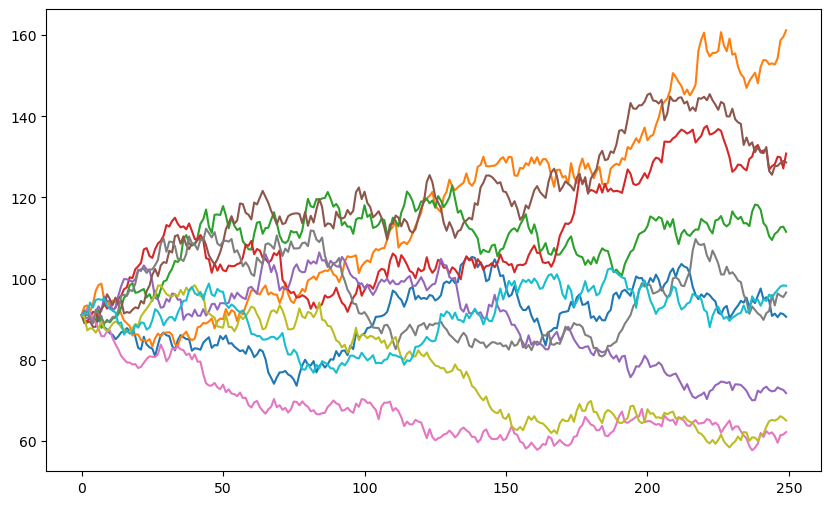

In [43]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

In [64]:
column_name = []
for i in range(t_intervals):
    column_name.append(str(i)+ '일 후 종가')
column_name

['0일 후 종가',
 '1일 후 종가',
 '2일 후 종가',
 '3일 후 종가',
 '4일 후 종가',
 '5일 후 종가',
 '6일 후 종가',
 '7일 후 종가',
 '8일 후 종가',
 '9일 후 종가',
 '10일 후 종가',
 '11일 후 종가',
 '12일 후 종가',
 '13일 후 종가',
 '14일 후 종가',
 '15일 후 종가',
 '16일 후 종가',
 '17일 후 종가',
 '18일 후 종가',
 '19일 후 종가',
 '20일 후 종가',
 '21일 후 종가',
 '22일 후 종가',
 '23일 후 종가',
 '24일 후 종가',
 '25일 후 종가',
 '26일 후 종가',
 '27일 후 종가',
 '28일 후 종가',
 '29일 후 종가',
 '30일 후 종가',
 '31일 후 종가',
 '32일 후 종가',
 '33일 후 종가',
 '34일 후 종가',
 '35일 후 종가',
 '36일 후 종가',
 '37일 후 종가',
 '38일 후 종가',
 '39일 후 종가',
 '40일 후 종가',
 '41일 후 종가',
 '42일 후 종가',
 '43일 후 종가',
 '44일 후 종가',
 '45일 후 종가',
 '46일 후 종가',
 '47일 후 종가',
 '48일 후 종가',
 '49일 후 종가',
 '50일 후 종가',
 '51일 후 종가',
 '52일 후 종가',
 '53일 후 종가',
 '54일 후 종가',
 '55일 후 종가',
 '56일 후 종가',
 '57일 후 종가',
 '58일 후 종가',
 '59일 후 종가',
 '60일 후 종가',
 '61일 후 종가',
 '62일 후 종가',
 '63일 후 종가',
 '64일 후 종가',
 '65일 후 종가',
 '66일 후 종가',
 '67일 후 종가',
 '68일 후 종가',
 '69일 후 종가',
 '70일 후 종가',
 '71일 후 종가',
 '72일 후 종가',
 '73일 후 종가',
 '74일 후 종가',
 '75일 후 종가',
 '76일 후 종가',
 '77일 후 종

In [65]:
index_name = []
for i in range(iterations):
    index_name.append(str(i+1) + '번째 예측')
index_name

['1번째 예측',
 '2번째 예측',
 '3번째 예측',
 '4번째 예측',
 '5번째 예측',
 '6번째 예측',
 '7번째 예측',
 '8번째 예측',
 '9번째 예측',
 '10번째 예측']

In [66]:
df_price=pd.DataFrame(price_list, index = column_name, columns = index_name)

In [67]:
df_price.T

,0일 후 종가,1일 후 종가,2일 후 종가,3일 후 종가,4일 후 종가,5일 후 종가,6일 후 종가,7일 후 종가,8일 후 종가,9일 후 종가,...,240일 후 종가,241일 후 종가,242일 후 종가,243일 후 종가,244일 후 종가,245일 후 종가,246일 후 종가,247일 후 종가,248일 후 종가,249일 후 종가
1번째 예측,90.949997,90.499951,91.408981,91.708195,89.613787,89.936749,89.469056,90.737520,87.993538,87.446689,...,97.533146,94.851559,95.377529,94.562634,90.768156,91.342929,90.461148,91.440667,91.223520,90.568548
2번째 예측,90.949997,93.112524,93.369291,91.883979,93.710244,96.982282,98.380231,98.726330,94.699795,94.438820,...,152.181506,153.904166,153.773719,152.823609,153.038865,152.750100,154.316873,158.740873,159.573698,161.205870
3번째 예측,90.949997,91.150377,91.407206,90.077749,89.253374,89.561895,92.268387,87.827078,88.877883,89.796303,...,116.941829,113.680707,112.837646,110.424568,109.492370,110.992094,111.548800,112.616597,112.770969,111.517954
4번째 예측,90.949997,89.835697,89.450727,90.371994,91.791559,91.491701,90.283515,92.434404,93.981151,92.600412,...,131.264918,131.563617,131.719765,126.846160,127.733709,128.163058,130.022417,129.872391,127.145028,130.810045
5번째 예측,90.949997,90.154688,90.310729,90.268357,89.068719,91.843470,93.125529,91.994406,95.570344,94.483810,...,71.893041,72.885871,73.332917,72.521185,72.183715,72.316742,73.168207,72.778149,72.537523,71.733963
6번째 예측,90.949997,88.974271,89.147214,89.394717,88.070807,88.104329,90.940648,92.455884,93.430554,96.118429,...,131.074966,130.897002,132.408468,126.515142,125.578347,127.688720,127.784425,128.484394,128.973694,128.622698
7번째 예측,90.949997,91.088085,92.735968,91.383071,90.055849,89.049403,87.549889,85.778997,85.764772,86.977535,...,61.913314,60.945035,62.357837,61.721701,62.068728,61.111807,59.511198,61.374625,61.524749,62.144965
8번째 예측,90.949997,92.111417,91.511954,90.308628,88.869450,92.291627,91.199146,90.316929,89.065966,89.352991,...,90.869148,89.799227,91.445909,91.977559,95.967830,93.359374,96.326622,95.781911,95.419381,96.552083
9번째 예측,90.949997,90.502485,87.219609,87.745997,87.572211,86.655815,87.844362,89.325783,87.774521,86.954539,...,61.330449,61.594541,63.455303,64.831006,65.154146,64.949038,65.351727,66.063033,65.636084,64.984707
10번째 예측,90.949997,91.490112,91.181377,94.062062,92.860632,94.727528,94.933993,94.726762,95.012426,93.332104,...,93.289453,94.886359,94.462607,96.026047,95.240059,96.385351,97.186115,98.022732,98.305129,98.216340


In [77]:
# 해당 기간 단순 보유했을 때, 배당을 고려하지 않은 순수 매매차익 수익률
round(((df_price.T['249일 후 종가'] - df_price.T['0일 후 종가'] )/ df_price.T['0일 후 종가']) * 100, 2)

1번째 예측     -0.42
2번째 예측     77.25
3번째 예측     22.61
4번째 예측     43.83
5번째 예측    -21.13
6번째 예측     41.42
7번째 예측    -31.67
8번째 예측      6.16
9번째 예측    -28.55
10번째 예측     7.99
dtype: float64